In [26]:
#import libraries
import numpy as np
import matplotlib.pylab as plt
import IPython.display
import librosa
import librosa.display

In [ ]:
def plot_audio_signal(signal, sr):
    """Plot the time-domain representation of a given waveform

    Args:
        signal: an array of signal data to plot
        sr: the sample rate we want to analyze the waveform using
    Returns:
        None
    Side Effects:
        Generates a plot of the given waveform
    """
    time = np.arange(0, signal.shape[0])/sr

    x_label = "Time (Seconds)"
    y_label = "Amplitude"

    signal_max = max(abs(signal))
    signal_scaled = signal / signal_max
    plt.plot(time, signal_scaled)
    plt.xlabel(x_label)
    plt.ylabel(y_label)


def makeDelays(sig,sr,sec,numDelays):
    #calculate the number of bytes which corresponds to the offset in milliseconds
    offset = int(sr*sec)
    
    #add extra space at the end for the delays
    ending = np.zeros((offset*(numDelays)))
    
    delayedSig = np.concatenate((sig,ending))
    
    for i in range(numDelays):
        
        #create some silence
        # python indexes starting with zero which is why you need to add one
        beginning = np.zeros(offset*(i+1))
        
        #create delayed version of signal
        delay = np.concatenate((beginning,sig))

        #pad the end of delay with zeros to make it the same length as delaysedSig
        delay = np.concatenate((delay,np.zeros((delayedSig.size-delay.size))))
        
        # combine with output signal
        delayedSig = delayedSig + delay
    
    return delayedSig

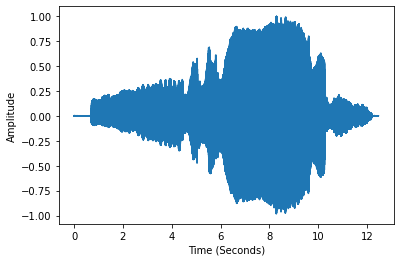

In [27]:
sig , sr = librosa.load('../audioFiles/avm.wav')
plot_audio_signal(sig, sr)

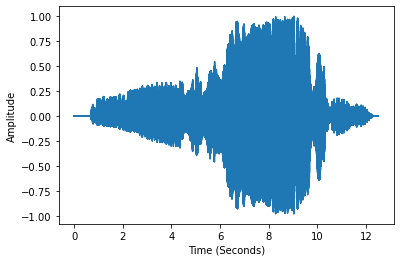

In [28]:
# add one 50 ms delay
delayedSig = makeDelays(sig,sr,0.050,1)
plot_audio_signal(delayedSig, sr)

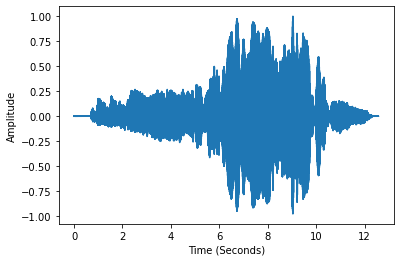

In [29]:
# add two 50 ms delays
delayedSig2 = makeDelays(sig,sr,0.050,2)
plot_audio_signal(delayedSig2, sr)

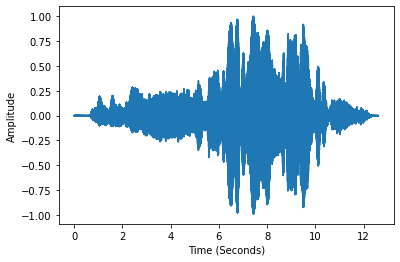

In [30]:
# add three 50 ms delays
delayedSig3 = makeDelays(sig,sr,0.050,3)
plot_audio_signal(delayedSig3, sr)

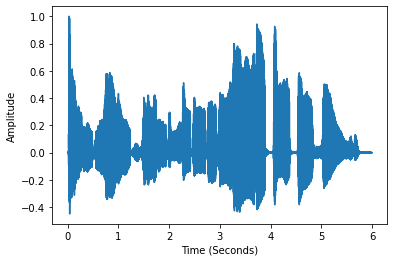

In [32]:
# load the trumpet signal
sig2 , sr2 = librosa.load('../audioFiles/trumpet.wav')
plot_audio_signal(sig2, sr)

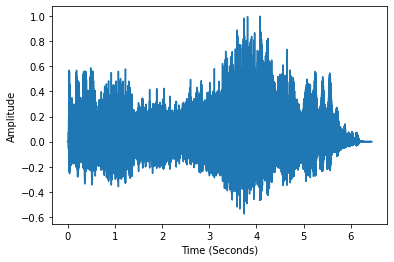

In [33]:
# add three 150 ms delays to the trumpet.wav file
delayedSigTrumpet = makeDelays(sig2,sr2,0.15,3)
plot_audio_signal(delayedSigTrumpet, sr2)